In [ ]:
import pandas as pd
df = pd.read_csv('Baggage_Data.csv')
df

,ActualArrival,FlightNumber,Origing,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime
0,07/23/2021 03:23:00 PM,3462,VUW,FTU,39,07/23/2021 03:37:03 PM,07/23/2021 03:38:25 PM
1,07/23/2021 04:03:00 PM,562,FTU,WFY,52,07/23/2021 04:13:07 PM,07/23/2021 04:16:19 PM
2,07/23/2021 04:38:00 PM,9717,WET,WEZ,25,07/23/2021 04:48:51 PM,07/23/2021 04:51:46 PM
3,07/23/2021 04:22:00 PM,3985,FTU,BEY,142,07/23/2021 04:24:47 PM,07/23/2021 04:36:47 PM
4,07/23/2021 04:21:00 PM,2841,XCB,WCX,6,07/23/2021 04:27:36 PM,07/23/2021 04:27:46 PM
...,...,...,...,...,...,...,...
399995,07/02/2022 12:02:00 AM,979,FTU,YUX,58,07/02/2022 12:12:22 AM,07/02/2022 12:15:46 AM
399996,07/02/2022 12:18:00 AM,764,FTU,WWT,138,07/02/2022 12:34:11 AM,07/02/2022 12:37:01 AM
399997,07/02/2022 12:51:00 AM,833,XZD,WWT,123,07/02/2022 01:02:32 AM,07/02/2022 01:08:08 AM
399998,07/02/2022 12:39:00 AM,5924,XCB,FUX,22,07/02/2022 12:49:56 AM,07/02/2022 12:51:11 AM


In [ ]:
len(df)

400000

In [ ]:
# prompt: add another column as "Automated_BaggageDeliveryTime" which is the difference of ActualArrival column and LastBagDrop Column in minutes
# Convert 'ActualArrival' and 'LastBagDrop' columns to datetime objects
df['ActualArrival'] = pd.to_datetime(df['ActualArrival'])
df['LastBagDropTime'] = pd.to_datetime(df['LastBagDropTime'])

# Calculate the time difference in minutes
df['Automated_BaggageDeliveryTime'] = (df['LastBagDropTime'] - df['ActualArrival']).dt.total_seconds() / 60

df.head(5)


<ipython-input-2-8947c4083e00>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ActualArrival'] = pd.to_datetime(df['ActualArrival'])
<ipython-input-2-8947c4083e00>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastBagDropTime'] = pd.to_datetime(df['LastBagDropTime'])


,ActualArrival,FlightNumber,Origing,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime,Automated_BaggageDeliveryTime
0,2021-07-23 15:23:00,3462,VUW,FTU,39,07/23/2021 03:37:03 PM,2021-07-23 15:38:25,15.416667
1,2021-07-23 16:03:00,562,FTU,WFY,52,07/23/2021 04:13:07 PM,2021-07-23 16:16:19,13.316667
2,2021-07-23 16:38:00,9717,WET,WEZ,25,07/23/2021 04:48:51 PM,2021-07-23 16:51:46,13.766667
3,2021-07-23 16:22:00,3985,FTU,BEY,142,07/23/2021 04:24:47 PM,2021-07-23 16:36:47,14.783333
4,2021-07-23 16:21:00,2841,XCB,WCX,6,07/23/2021 04:27:36 PM,2021-07-23 16:27:46,6.766667


In [ ]:
len(df)

400000

In [ ]:
# prompt: calculate the empirical probability of the BaggageDeliveryTime <= 21 minutes

# Count the number of flights with BaggageDeliveryTime <= 21 minutes
count_less_than_21 = len(df[df['Automated_BaggageDeliveryTime'] <= 21])

print(count_less_than_21)
# Calculate the empirical probability
empirical_probability = count_less_than_21 / len(df)

print("Empirical probability of BaggageDeliveryTime <= 21 minutes:", empirical_probability)


328399
Empirical probability of BaggageDeliveryTime <= 21 minutes: 0.8209975


In [ ]:
df.drop_duplicates(inplace=True)
df

,ActualArrival,FlightNumber,Origing,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime,Automated_BaggageDeliveryTime
0,2021-07-23 15:23:00,3462,VUW,FTU,39,07/23/2021 03:37:03 PM,2021-07-23 15:38:25,15.416667
1,2021-07-23 16:03:00,562,FTU,WFY,52,07/23/2021 04:13:07 PM,2021-07-23 16:16:19,13.316667
2,2021-07-23 16:38:00,9717,WET,WEZ,25,07/23/2021 04:48:51 PM,2021-07-23 16:51:46,13.766667
3,2021-07-23 16:22:00,3985,FTU,BEY,142,07/23/2021 04:24:47 PM,2021-07-23 16:36:47,14.783333
4,2021-07-23 16:21:00,2841,XCB,WCX,6,07/23/2021 04:27:36 PM,2021-07-23 16:27:46,6.766667
...,...,...,...,...,...,...,...,...
399995,2022-07-02 00:02:00,979,FTU,YUX,58,07/02/2022 12:12:22 AM,2022-07-02 00:15:46,13.766667
399996,2022-07-02 00:18:00,764,FTU,WWT,138,07/02/2022 12:34:11 AM,2022-07-02 00:37:01,19.016667
399997,2022-07-02 00:51:00,833,XZD,WWT,123,07/02/2022 01:02:32 AM,2022-07-02 01:08:08,17.133333
399998,2022-07-02 00:39:00,5924,XCB,FUX,22,07/02/2022 12:49:56 AM,2022-07-02 00:51:11,12.183333


In [ ]:
df['ActualArrival_datetime_column'] = pd.to_datetime(df['ActualArrival'])
df['ActualArrival_datetime_column'] = pd.to_datetime(df['ActualArrival_datetime_column'])

# Extract the time component and convert it to seconds
df['ActualArrivalTimeInSeconds'] = df['ActualArrival_datetime_column'].dt.hour * 3600 + df['ActualArrival_datetime_column'].dt.minute * 60 + df['ActualArrival_datetime_column'].dt.second
df['ActualArrivalTimeInMinutes'] = df['ActualArrivalTimeInSeconds'] / 60
df.head(5)

,ActualArrival,FlightNumber,Origing,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime,Automated_BaggageDeliveryTime,ActualArrival_datetime_column,ActualArrivalTimeInSeconds,ActualArrivalTimeInMinutes
0,2021-07-23 15:23:00,3462,VUW,FTU,39,07/23/2021 03:37:03 PM,2021-07-23 15:38:25,15.416667,2021-07-23 15:23:00,55380,923.0
1,2021-07-23 16:03:00,562,FTU,WFY,52,07/23/2021 04:13:07 PM,2021-07-23 16:16:19,13.316667,2021-07-23 16:03:00,57780,963.0
2,2021-07-23 16:38:00,9717,WET,WEZ,25,07/23/2021 04:48:51 PM,2021-07-23 16:51:46,13.766667,2021-07-23 16:38:00,59880,998.0
3,2021-07-23 16:22:00,3985,FTU,BEY,142,07/23/2021 04:24:47 PM,2021-07-23 16:36:47,14.783333,2021-07-23 16:22:00,58920,982.0
4,2021-07-23 16:21:00,2841,XCB,WCX,6,07/23/2021 04:27:36 PM,2021-07-23 16:27:46,6.766667,2021-07-23 16:21:00,58860,981.0


In [ ]:
df['LastBagDropTime_datetime_column'] = pd.to_datetime(df['LastBagDropTime'])

# Extract the time component and convert it to seconds
df['LastBagDropTimeInSeconds'] = df['LastBagDropTime_datetime_column'].dt.hour * 3600 + df['LastBagDropTime_datetime_column'].dt.minute * 60 + df['LastBagDropTime_datetime_column'].dt.second
df['LastBagDropTimeInMinutes'] = df['LastBagDropTimeInSeconds'] / 60

In [ ]:
df['FirstBagDropTime_datetime_column'] = pd.to_datetime(df['FirstBagDropTime'])
df['FirstBagDropTime_datetime_column'] = pd.to_datetime(df['FirstBagDropTime_datetime_column'])

# Extract the time component and convert it to seconds
df['FirstBagDropTimeTimeInSeconds'] = df['FirstBagDropTime_datetime_column'].dt.hour * 3600 + df['FirstBagDropTime_datetime_column'].dt.minute * 60 + df['FirstBagDropTime_datetime_column'].dt.second
df['FirstBagDropTimeTimeInMinutes'] = df['FirstBagDropTimeTimeInSeconds'] / 60

<ipython-input-8-dee94a0e5eb4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FirstBagDropTime_datetime_column'] = pd.to_datetime(df['FirstBagDropTime'])


In [ ]:
# prompt: count the number of rows where the actualarrival column is after firstBagDropTime column
count = 0
for index, row in df.iterrows():
  if row['ActualArrival_datetime_column'] > row['FirstBagDropTime_datetime_column']:
    count+=1
print(count)

KeyboardInterrupt: 

In [ ]:
# prompt: count the number of rows where the actualarrival column is after lastBagDropTime colum

count = 0
for index, row in df.iterrows():
  if row['ActualArrival_datetime_column'] > row['LastBagDropTime_datetime_column']:
    count+=1
print(count)


0


In [ ]:
# prompt: count number of FirstBagDropTime colummn more than lastBagDropTime column

count = 0
for index, row in df.iterrows():
  if row['FirstBagDropTime_datetime_column'] > row['LastBagDropTime_datetime_column']:
    count+=1
print(count)


0


In [ ]:
# count number of FirstBagDropTime colummn same as lastBagDropTime column

count = 0
for index, row in df.iterrows():
  if row['FirstBagDropTime_datetime_column'] == row['LastBagDropTime_datetime_column']:
    count+=1
print(count)


4024


In [ ]:
count = 0
for index, row in df.iterrows():
  if row['FirstBagDropTime_datetime_column'] == row['LastBagDropTime_datetime_column'] and row['ExpectedBagsCount'] > 1:
    count+=1
print(count)


1844


In [ ]:
# prompt: remove the rows from the dataset where the firstBagDropTime column and LastBagDropTime column are the same and ExpectedBagsCount > 1

# Filter the DataFrame to exclude rows where conditions are met
df = df[~((df['FirstBagDropTime_datetime_column'] == df['LastBagDropTime_datetime_column']) & (df['ExpectedBagsCount'] > 1))]

# Verify the removal
count = 0
for index, row in df.iterrows():
  if row['FirstBagDropTime_datetime_column'] == row['LastBagDropTime_datetime_column'] and row['ExpectedBagsCount'] > 1:
    count+=1
print(count)  # Output should be 0


0


In [ ]:
len(df)

314901

In [ ]:
Zero_BagCount = df[df['ExpectedBagsCount'] == 0]
Zero_BagCount

,ActualArrival,FlightNumber,Origing,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime,Automated_BaggageDeliveryTime,ActualArrival_datetime_column,ActualArrivalTimeInSeconds,ActualArrivalTimeInMinutes,LastBagDropTime_datetime_column,LastBagDropTimeInSeconds,LastBagDropTimeInMinutes,FirstBagDropTime_datetime_column,FirstBagDropTimeTimeInSeconds,FirstBagDropTimeTimeInMinutes,BaggageDeliveryTime


In [ ]:
df.drop(Zero_BagCount.index, axis=0,inplace=True)
len(df)

314517

In [ ]:
# count of Origin = Destination
count = 0
for index, row in df.iterrows():
  if row['Origing'] == row['Destination']:
    count+=1
print(count)

118


In [ ]:
df = df[~((df['Origing'] == df['Destination']))]
len(df)

314517

In [ ]:
df.head(5)

,ActualArrival,FlightNumber,Origing,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime,ActualArrival_datetime_column,ActualArrivalTimeInSeconds,ActualArrivalTimeInMinutes,LastBagDropTime_datetime_column,LastBagDropTimeInSeconds,LastBagDropTimeInMinutes,FirstBagDropTime_datetime_column,FirstBagDropTimeTimeInSeconds,FirstBagDropTimeTimeInMinutes
0,07/23/2021 03:23:00 PM,3462,VUW,FTU,39,07/23/2021 03:37:03 PM,07/23/2021 03:38:25 PM,2021-07-23 15:23:00,55380,923.0,2021-07-23 15:38:25,56305,938.416667,2021-07-23 15:37:03,56223,937.050000
1,07/23/2021 04:03:00 PM,562,FTU,WFY,52,07/23/2021 04:13:07 PM,07/23/2021 04:16:19 PM,2021-07-23 16:03:00,57780,963.0,2021-07-23 16:16:19,58579,976.316667,2021-07-23 16:13:07,58387,973.116667
2,07/23/2021 04:38:00 PM,9717,WET,WEZ,25,07/23/2021 04:48:51 PM,07/23/2021 04:51:46 PM,2021-07-23 16:38:00,59880,998.0,2021-07-23 16:51:46,60706,1011.766667,2021-07-23 16:48:51,60531,1008.850000
3,07/23/2021 04:22:00 PM,3985,FTU,BEY,142,07/23/2021 04:24:47 PM,07/23/2021 04:36:47 PM,2021-07-23 16:22:00,58920,982.0,2021-07-23 16:36:47,59807,996.783333,2021-07-23 16:24:47,59087,984.783333
4,07/23/2021 04:21:00 PM,2841,XCB,WCX,6,07/23/2021 04:27:36 PM,07/23/2021 04:27:46 PM,2021-07-23 16:21:00,58860,981.0,2021-07-23 16:27:46,59266,987.766667,2021-07-23 16:27:36,59256,987.600000


In [ ]:
df['BaggageDeliveryTime'] = df['LastBagDropTimeInMinutes'] - df['ActualArrivalTimeInMinutes']
df.head(5)

<ipython-input-13-2436e798ddb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BaggageDeliveryTime'] = df['LastBagDropTimeInMinutes'] - df['ActualArrivalTimeInMinutes']


,ActualArrival,FlightNumber,Origing,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime,Automated_BaggageDeliveryTime,ActualArrival_datetime_column,ActualArrivalTimeInSeconds,ActualArrivalTimeInMinutes,LastBagDropTime_datetime_column,LastBagDropTimeInSeconds,LastBagDropTimeInMinutes,FirstBagDropTime_datetime_column,FirstBagDropTimeTimeInSeconds,FirstBagDropTimeTimeInMinutes,BaggageDeliveryTime
0,2021-07-23 15:23:00,3462,VUW,FTU,39,07/23/2021 03:37:03 PM,2021-07-23 15:38:25,15.416667,2021-07-23 15:23:00,55380,923.0,2021-07-23 15:38:25,56305,938.416667,2021-07-23 15:37:03,56223,937.050000,15.416667
1,2021-07-23 16:03:00,562,FTU,WFY,52,07/23/2021 04:13:07 PM,2021-07-23 16:16:19,13.316667,2021-07-23 16:03:00,57780,963.0,2021-07-23 16:16:19,58579,976.316667,2021-07-23 16:13:07,58387,973.116667,13.316667
2,2021-07-23 16:38:00,9717,WET,WEZ,25,07/23/2021 04:48:51 PM,2021-07-23 16:51:46,13.766667,2021-07-23 16:38:00,59880,998.0,2021-07-23 16:51:46,60706,1011.766667,2021-07-23 16:48:51,60531,1008.850000,13.766667
3,2021-07-23 16:22:00,3985,FTU,BEY,142,07/23/2021 04:24:47 PM,2021-07-23 16:36:47,14.783333,2021-07-23 16:22:00,58920,982.0,2021-07-23 16:36:47,59807,996.783333,2021-07-23 16:24:47,59087,984.783333,14.783333
4,2021-07-23 16:21:00,2841,XCB,WCX,6,07/23/2021 04:27:36 PM,2021-07-23 16:27:46,6.766667,2021-07-23 16:21:00,58860,981.0,2021-07-23 16:27:46,59266,987.766667,2021-07-23 16:27:36,59256,987.600000,6.766667


In [ ]:
# prompt: calculate the empirical probability of the BaggageDeliveryTime <= 21 minutes

# Count the number of flights with BaggageDeliveryTime <= 21 minutes
count_less_than_21 = len(df[df['BaggageDeliveryTime'] <= 21])
print(count_less_than_21)
# Calculate the empirical probability
empirical_probability = count_less_than_21 / len(df)

print("Empirical probability of BaggageDeliveryTime <= 21 minutes:", empirical_probability)
print("total length of the clean dataset", len(df))


255931
Empirical probability of BaggageDeliveryTime <= 21 minutes: 0.8137270799352658
total length of the clean dataset 314517


In [ ]:
# prompt: calculate the mean, and standard deviation of the baggagedeliverytime

# Calculate the mean of BaggageDeliveryTime
mean_baggage_delivery_time = df['BaggageDeliveryTime'].mean()

# Calculate the standard deviation of BaggageDeliveryTime
std_dev_baggage_delivery_time = df['BaggageDeliveryTime'].std()

print("Mean Baggage Delivery Time:", mean_baggage_delivery_time)
print("Standard Deviation of Baggage Delivery Time:", std_dev_baggage_delivery_time)


Mean Baggage Delivery Time: -1.1809931842581902
Standard Deviation of Baggage Delivery Time: 157.44353709647115


In [ ]:
min(df['BaggageDeliveryTime'])

-1438.0166666666667

In [ ]:
print(len(df) / 400000)

0.7862925


In [ ]:
# prompt: remove all negative BaggageDeliveryTime from df

print(len(df[df['BaggageDeliveryTime'] < 0]))  # Output should be 0

# Filter the DataFrame to exclude rows with negative BaggageDeliveryTime
df = df[df['BaggageDeliveryTime'] >= 0]

# Verify the removal
print(len(df[df['BaggageDeliveryTime'] < 0]))  # Output should be 0


3814
0


In [ ]:
# prompt: calculate the empirical probability of the BaggageDeliveryTime <= 21 minutes

# Count the number of flights with BaggageDeliveryTime <= 21 minutes
count_less_than_21 = len(df[df['BaggageDeliveryTime'] <= 21])
print(count_less_than_21)
# Calculate the empirical probability
empirical_probability = count_less_than_21 / len(df)

print("Empirical probability of BaggageDeliveryTime <= 21 minutes:", empirical_probability)
print("total length of the clean dataset", len(df))

252117
Empirical probability of BaggageDeliveryTime <= 21 minutes: 0.8114405074942952
total length of the clean dataset 310703


In [ ]:
# prompt: calculate the mean, and standard deviation of the baggagedeliverytime

# Calculate the mean of BaggageDeliveryTime
mean_baggage_delivery_time = df['BaggageDeliveryTime'].mean()

# Calculate the standard deviation of BaggageDeliveryTime
std_dev_baggage_delivery_time = df['BaggageDeliveryTime'].std()

print("Mean Baggage Delivery Time:", mean_baggage_delivery_time)
print("Standard Deviation of Baggage Delivery Time:", std_dev_baggage_delivery_time)


Mean Baggage Delivery Time: 16.247329550513946
Standard Deviation of Baggage Delivery Time: 6.637729066547706


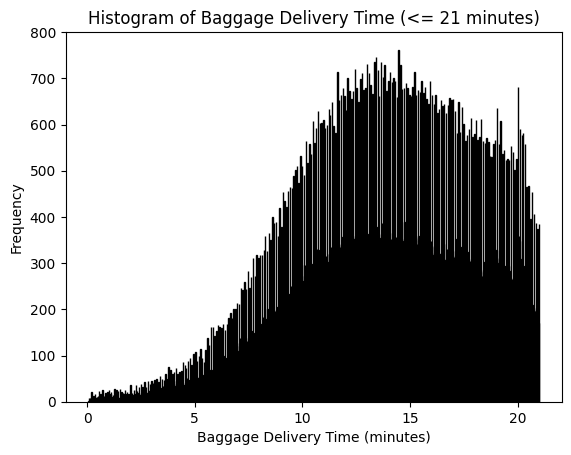

In [ ]:
# prompt: histogram of baggagedelierytime where baggage deliverytime <= 21 minutes

import matplotlib.pyplot as plt

# Filter the DataFrame for BaggageDeliveryTime <= 21 minutes
df_filtered = df[df['BaggageDeliveryTime'] <= 21]

# Create the histogram
plt.hist(df_filtered['BaggageDeliveryTime'], bins=1000, edgecolor='black')
plt.xlabel('Baggage Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Baggage Delivery Time (<= 21 minutes)')
plt.show()


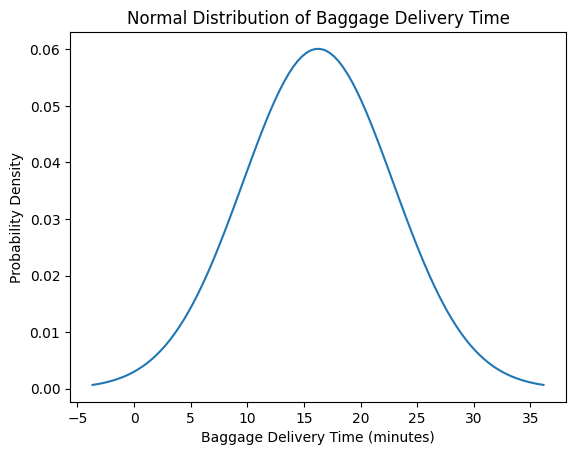

In [ ]:
# prompt: plot the normal distribution of the baggage delivery time

import numpy as np
import scipy.stats as stats

# Calculate the mean and standard deviation of BaggageDeliveryTime
mean_baggage_delivery_time = df['BaggageDeliveryTime'].mean()
std_dev_baggage_delivery_time = df['BaggageDeliveryTime'].std()

# Generate x-values for the normal distribution curve
x = np.linspace(mean_baggage_delivery_time - 3 * std_dev_baggage_delivery_time,
                mean_baggage_delivery_time + 3 * std_dev_baggage_delivery_time, 100)

# Calculate the corresponding y-values (probability density function)
y = stats.norm.pdf(x, mean_baggage_delivery_time, std_dev_baggage_delivery_time)

# Plot the normal distribution curve
plt.plot(x, y)
plt.xlabel('Baggage Delivery Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Baggage Delivery Time')
plt.show()


In [ ]:
df['BaggageDeliveryTime'].mean()

16.247329550513946

In [ ]:
df['BaggageDeliveryTime'].std()

6.637729066547706

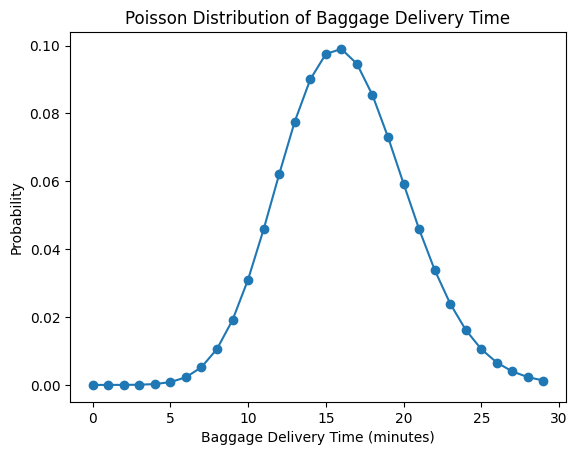

In [ ]:
# prompt: plot poisson distribution for BaggageDeliveryTime

# Calculate the mean of BaggageDeliveryTime
mean_baggage_delivery_time = df['BaggageDeliveryTime'].mean()

# Generate x-values for the Poisson distribution
x = np.arange(0, 30)  # Adjust the range as needed

# Calculate the corresponding y-values (probability mass function)
y = stats.poisson.pmf(x, mu=mean_baggage_delivery_time)

# Plot the Poisson distribution
plt.plot(x, y, marker='o')
plt.xlabel('Baggage Delivery Time (minutes)')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Baggage Delivery Time')
plt.show()


In [ ]:
# prompt: Generate the probability distribution of the BaggageDeliveryTime <= 21 minutes using a normal probability distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate mean and standard deviation of BaggageDeliveryTime
mean_delivery_time = df[''].mean()
std_delivery_time = df['BaggageDeliveryTime'].std()

# Generate x-values for the probability distribution
x = np.linspace(0, df['BaggageDeliveryTime'].max(), 100)

# Calculate the normal probability density function (PDF)
pdf = norm.pdf(x, mean_delivery_time, std_delivery_time)

# Plot the probability distribution
plt.plot(x, pdf)
plt.xlabel('Baggage Delivery Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Normal Probability Distribution of Baggage Delivery Time')

# Shade the area representing BaggageDeliveryTime <= 21 minutes
x_less_than_21 = np.linspace(0, 21, 100)
plt.fill_between(x_less_than_21, norm.pdf(x_less_than_21, mean_delivery_time, std_delivery_time), alpha=0.5)

plt.show()

# Calculate the probability of BaggageDeliveryTime <= 21 minutes using the cumulative distribution function (CDF)
probability_less_than_21 = norm.cdf(21, mean_delivery_time, std_delivery_time)
print("Probability of BaggageDeliveryTime <= 21 minutes (from normal distribution):", probability_less_than_21)


KeyError: 'BaggageDeliveryTime'

In [ ]:
df['ActualArrival_datetime_column'] = pd.to_datetime(df['ActualArrival'])
df['ActualArrival_datetime_column'].head(5)

<ipython-input-20-20ac2785efee>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ActualArrival_datetime_column'] = pd.to_datetime(df['ActualArrival'])


0   2021-07-23 15:23:00
1   2021-07-23 16:03:00
2   2021-07-23 16:38:00
3   2021-07-23 16:22:00
4   2021-07-23 16:21:00
Name: ActualArrival_datetime_column, dtype: datetime64[ns]

In [ ]:
df['ActualArrival_datetime_column'] = pd.to_datetime(df['ActualArrival_datetime_column'])

# Extract the time component and convert it to seconds
df['ActualArrivalTimeInSeconds'] = df['ActualArrival_datetime_column'].dt.hour * 3600 + df['ActualArrival_datetime_column'].dt.minute * 60 + df['ActualArrival_datetime_column'].dt.second
df['ActualArrivalTimeInMinutes'] = df['ActualArrivalTimeInSeconds'] / 60

In [ ]:
df.head(5)

,ActualArrival,FlightNumber,Origing,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime,datetime_column,ActualArrival_datetime_column,ActualArrivalTimeInSeconds,ActualArrivalTimeInMinutes
0,07/23/2021 03:23:00 PM,3462,VUW,FTU,39,07/23/2021 03:37:03 PM,07/23/2021 03:38:25 PM,2021-07-23 15:23:00,2021-07-23 15:23:00,55380,923.0
1,07/23/2021 04:03:00 PM,562,FTU,WFY,52,07/23/2021 04:13:07 PM,07/23/2021 04:16:19 PM,2021-07-23 16:03:00,2021-07-23 16:03:00,57780,963.0
2,07/23/2021 04:38:00 PM,9717,WET,WEZ,25,07/23/2021 04:48:51 PM,07/23/2021 04:51:46 PM,2021-07-23 16:38:00,2021-07-23 16:38:00,59880,998.0
3,07/23/2021 04:22:00 PM,3985,FTU,BEY,142,07/23/2021 04:24:47 PM,07/23/2021 04:36:47 PM,2021-07-23 16:22:00,2021-07-23 16:22:00,58920,982.0
4,07/23/2021 04:21:00 PM,2841,XCB,WCX,6,07/23/2021 04:27:36 PM,07/23/2021 04:27:46 PM,2021-07-23 16:21:00,2021-07-23 16:21:00,58860,981.0


In [ ]:
df['LastBagDropTime_datetime_column'] = pd.to_datetime(df['LastBagDropTime'])
df['LastBagDropTime_datetime_column'].head(5)

<ipython-input-26-9d0052c9dcf9>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastBagDropTime_datetime_column'] = pd.to_datetime(df['LastBagDropTime'])


0   2021-07-23 15:38:25
1   2021-07-23 16:16:19
2   2021-07-23 16:51:46
3   2021-07-23 16:36:47
4   2021-07-23 16:27:46
Name: LastBagDropTime_datetime_column, dtype: datetime64[ns]

In [ ]:
# Extract the time component and convert it to seconds
df['LastBagDropTimeInSeconds'] = df['LastBagDropTime_datetime_column'].dt.hour * 3600 + df['LastBagDropTime_datetime_column'].dt.minute * 60 + df['LastBagDropTime_datetime_column'].dt.second
df['LastBagDropTimeInMinutes'] = df['LastBagDropTimeInSeconds'] / 60

In [ ]:
df.head(5)

,ActualArrival,FlightNumber,Origing,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime,datetime_column,ActualArrival_datetime_column,ActualArrivalTimeInSeconds,ActualArrivalTimeInMinutes,LastBagDropTime_datetime_column,LastBagDropTimeInSeconds,LastBagDropTimeInMinutes
0,07/23/2021 03:23:00 PM,3462,VUW,FTU,39,07/23/2021 03:37:03 PM,07/23/2021 03:38:25 PM,2021-07-23 15:23:00,2021-07-23 15:23:00,55380,923.0,2021-07-23 15:38:25,56305,938.416667
1,07/23/2021 04:03:00 PM,562,FTU,WFY,52,07/23/2021 04:13:07 PM,07/23/2021 04:16:19 PM,2021-07-23 16:03:00,2021-07-23 16:03:00,57780,963.0,2021-07-23 16:16:19,58579,976.316667
2,07/23/2021 04:38:00 PM,9717,WET,WEZ,25,07/23/2021 04:48:51 PM,07/23/2021 04:51:46 PM,2021-07-23 16:38:00,2021-07-23 16:38:00,59880,998.0,2021-07-23 16:51:46,60706,1011.766667
3,07/23/2021 04:22:00 PM,3985,FTU,BEY,142,07/23/2021 04:24:47 PM,07/23/2021 04:36:47 PM,2021-07-23 16:22:00,2021-07-23 16:22:00,58920,982.0,2021-07-23 16:36:47,59807,996.783333
4,07/23/2021 04:21:00 PM,2841,XCB,WCX,6,07/23/2021 04:27:36 PM,07/23/2021 04:27:46 PM,2021-07-23 16:21:00,2021-07-23 16:21:00,58860,981.0,2021-07-23 16:27:46,59266,987.766667


In [ ]:
df['BaggageDeliveryTime'] = df['LastBagDropTimeInMinutes'] - df['ActualArrivalTimeInMinutes']

In [ ]:
df.head(10)

,ActualArrival,FlightNumber,Origing,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime,datetime_column,ActualArrival_datetime_column,ActualArrivalTimeInSeconds,ActualArrivalTimeInMinutes,LastBagDropTime_datetime_column,LastBagDropTimeInSeconds,LastBagDropTimeInMinutes,BaggaeDeliveryTime,BaggageDeliveryTime
0,07/23/2021 03:23:00 PM,3462,VUW,FTU,39,07/23/2021 03:37:03 PM,07/23/2021 03:38:25 PM,2021-07-23 15:23:00,2021-07-23 15:23:00,55380,923.0,2021-07-23 15:38:25,56305,938.416667,15.416667,15.416667
1,07/23/2021 04:03:00 PM,562,FTU,WFY,52,07/23/2021 04:13:07 PM,07/23/2021 04:16:19 PM,2021-07-23 16:03:00,2021-07-23 16:03:00,57780,963.0,2021-07-23 16:16:19,58579,976.316667,13.316667,13.316667
2,07/23/2021 04:38:00 PM,9717,WET,WEZ,25,07/23/2021 04:48:51 PM,07/23/2021 04:51:46 PM,2021-07-23 16:38:00,2021-07-23 16:38:00,59880,998.0,2021-07-23 16:51:46,60706,1011.766667,13.766667,13.766667
3,07/23/2021 04:22:00 PM,3985,FTU,BEY,142,07/23/2021 04:24:47 PM,07/23/2021 04:36:47 PM,2021-07-23 16:22:00,2021-07-23 16:22:00,58920,982.0,2021-07-23 16:36:47,59807,996.783333,14.783333,14.783333
4,07/23/2021 04:21:00 PM,2841,XCB,WCX,6,07/23/2021 04:27:36 PM,07/23/2021 04:27:46 PM,2021-07-23 16:21:00,2021-07-23 16:21:00,58860,981.0,2021-07-23 16:27:46,59266,987.766667,6.766667,6.766667
6,07/23/2021 04:13:00 PM,52,FTU,TZB,106,07/23/2021 04:23:12 PM,07/23/2021 04:26:41 PM,2021-07-23 16:13:00,2021-07-23 16:13:00,58380,973.0,2021-07-23 16:26:41,59201,986.683333,13.683333,13.683333
8,07/23/2021 04:32:00 PM,5760,WET,XCB,48,07/23/2021 04:40:15 PM,07/23/2021 04:43:11 PM,2021-07-23 16:32:00,2021-07-23 16:32:00,59520,992.0,2021-07-23 16:43:11,60191,1003.183333,11.183333,11.183333
9,07/23/2021 05:10:00 PM,701,WET,XFA,124,07/23/2021 05:18:15 PM,07/23/2021 05:24:18 PM,2021-07-23 17:10:00,2021-07-23 17:10:00,61800,1030.0,2021-07-23 17:24:18,62658,1044.300000,14.300000,14.300000
10,07/23/2021 09:34:00 PM,3756,XZX,FTU,43,07/23/2021 09:51:40 PM,07/23/2021 09:55:45 PM,2021-07-23 21:34:00,2021-07-23 21:34:00,77640,1294.0,2021-07-23 21:55:45,78945,1315.750000,21.750000,21.750000
11,07/23/2021 10:18:00 PM,6106,EVF,YZU,20,07/23/2021 10:25:25 PM,07/23/2021 10:26:02 PM,2021-07-23 22:18:00,2021-07-23 22:18:00,80280,1338.0,2021-07-23 22:26:02,80762,1346.033333,8.033333,8.033333


In [ ]:
# prompt: count the rows where BaggageClaimTime is less than 21 minutes
count = df[df['BaggageDeliveryTime'] < 21].shape[0]
print(count)

257223


In [ ]:
df['BaggageDeliveryTime_under21mins'] = df['BaggageDeliveryTime'] < 21

In [ ]:
# prompt: count the rows where BaggageClaimTime is less than 21 minutes
count = df[df['BaggageDeliveryTime']  > 21].shape[0]
print(count)

59058


In [ ]:
len(df)

316479

In [ ]:
# prompt: count the rows where BaggageClaimTime is less than 21 minutes
count = df[df['BaggageDeliveryTime'] == 21].shape[0]
print(count)

198


In [ ]:
df['FirstBagDropTime_datetime_column'] = pd.to_datetime(df['FirstBagDropTime'])
df['FirstBagDropTime_datetime_column'] = pd.to_datetime(df['FirstBagDropTime_datetime_column'])

# Extract the time component and convert it to seconds
df['FirstBagDropTimeTimeInSeconds'] = df['FirstBagDropTime_datetime_column'].dt.hour * 3600 + df['FirstBagDropTime_datetime_column'].dt.minute * 60 + df['FirstBagDropTime_datetime_column'].dt.second
df['FirstBagDropTimeTimeInMinutes'] = df['FirstBagDropTimeTimeInSeconds'] / 60

<ipython-input-47-dee94a0e5eb4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FirstBagDropTime_datetime_column'] = pd.to_datetime(df['FirstBagDropTime'])


In [ ]:
df.head(5)

,ActualArrival,FlightNumber,Origing,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime,datetime_column,ActualArrival_datetime_column,ActualArrivalTimeInSeconds,ActualArrivalTimeInMinutes,LastBagDropTime_datetime_column,LastBagDropTimeInSeconds,LastBagDropTimeInMinutes,BaggaeDeliveryTime,BaggageDeliveryTime,BaggageDeliveryTime_under21mins,FirstBagDropTime_datetime_column,FirstBagDropTimeTimeInSeconds,FirstBagDropTimeTimeInMinutes
0,07/23/2021 03:23:00 PM,3462,VUW,FTU,39,07/23/2021 03:37:03 PM,07/23/2021 03:38:25 PM,2021-07-23 15:23:00,2021-07-23 15:23:00,55380,923.0,2021-07-23 15:38:25,56305,938.416667,15.416667,15.416667,True,2021-07-23 15:37:03,56223,937.050000
1,07/23/2021 04:03:00 PM,562,FTU,WFY,52,07/23/2021 04:13:07 PM,07/23/2021 04:16:19 PM,2021-07-23 16:03:00,2021-07-23 16:03:00,57780,963.0,2021-07-23 16:16:19,58579,976.316667,13.316667,13.316667,True,2021-07-23 16:13:07,58387,973.116667
2,07/23/2021 04:38:00 PM,9717,WET,WEZ,25,07/23/2021 04:48:51 PM,07/23/2021 04:51:46 PM,2021-07-23 16:38:00,2021-07-23 16:38:00,59880,998.0,2021-07-23 16:51:46,60706,1011.766667,13.766667,13.766667,True,2021-07-23 16:48:51,60531,1008.850000
3,07/23/2021 04:22:00 PM,3985,FTU,BEY,142,07/23/2021 04:24:47 PM,07/23/2021 04:36:47 PM,2021-07-23 16:22:00,2021-07-23 16:22:00,58920,982.0,2021-07-23 16:36:47,59807,996.783333,14.783333,14.783333,True,2021-07-23 16:24:47,59087,984.783333
4,07/23/2021 04:21:00 PM,2841,XCB,WCX,6,07/23/2021 04:27:36 PM,07/23/2021 04:27:46 PM,2021-07-23 16:21:00,2021-07-23 16:21:00,58860,981.0,2021-07-23 16:27:46,59266,987.766667,6.766667,6.766667,True,2021-07-23 16:27:36,59256,987.600000


In [ ]:
#checking if actualArrival < FirstBagDrop
df['arrival_before_firstBag'] = df['ActualArrivalTimeInMinutes'] < df['FirstBagDropTimeTimeInMinutes']

count = df[df['arrival_before_firstBag']  == True].shape[0]
print("ArrivalTime of the flight is before first bag arrives at the claim: ",count)

count = df[df['arrival_before_firstBag']  == False].shape[0]
print("ArrivalTime of the flight is after first bag arrives at the claim: ",count)


ArrivalTime of the flight is before first bag arrives at the claim:  313521
ArrivalTime of the flight is after first bag arrives at the claim:  2958


In [ ]:
#checking if actualArrival < LastBagDrop
df['arrival_before_lastBag'] = df['ActualArrivalTimeInMinutes'] < df['LastBagDropTimeInMinutes']

count = df[df['arrival_before_lastBag']  == True].shape[0]
print("ArrivalTime of the flight is before last bag arrives at the claim: ",count)

count = df[df['arrival_before_lastBag']  == False].shape[0]
print("ArrivalTime of the flight is after last bag arrives at the claim: ",count)


ArrivalTime of the flight is before last bag arrives at the claim:  312658
ArrivalTime of the flight is after last bag arrives at the claim:  3821


In [ ]:
#checking if Origing same or different than Destination
df['Different_Origin_Destination'] = df['Origing'] == df['Destination']

count = df[df['Different_Origin_Destination']  == True].shape[0]
print("Origin and Destination are different: ",count)

count = df[df['Different_Origin_Destination']  == False].shape[0]
print("Origin and Destination are same: ",count)

Origin and Destination are different:  118
Origin and Destination are same:  316361


In [ ]:
#checking if actualArrival < LastBagDrop
df['firstBag_before_lastBag'] = df['FirstBagDropTimeTimeInMinutes'] < df['LastBagDropTimeInMinutes']

count = df[df['firstBag_before_lastBag']  == True].shape[0]
print("first bag came before last bag arrives at the claim: ",count)

count = df[df['firstBag_before_lastBag']  == False].shape[0]
print("first bag came after last bag arrives at the claim: ",count)


first bag came before last bag arrives at the claim:  311676
first bag came after last bag arrives at the claim:  4803


In [ ]:
count = df[df['BaggageDeliveryTime'] <= 21].shape[0]
print('Probability of Baggage Delivery Time meeting the 21 minute marks: ', count/len(df))

Probability of Baggage Delivery Time meeting the 21 minute marks:  0.8133904619263838


In [ ]:
count = df[df['BaggageDeliveryTime'] > 21].shape[0]
print('Probability of Baggage Delivery Time going past the 21 minute marks: ', count/len(df))

Probability of Baggage Delivery Time going past the 21 minute marks:  0.18660953807361627


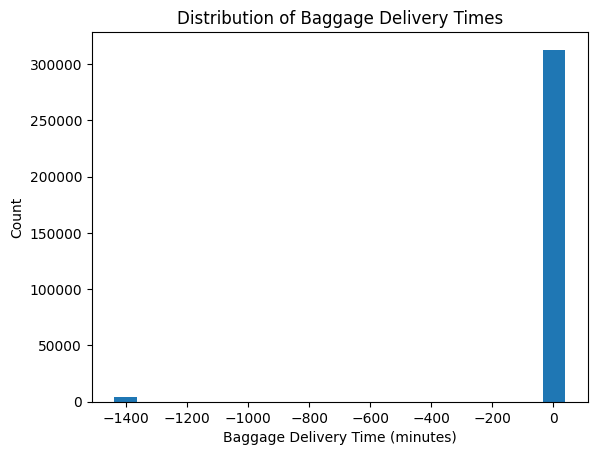

In [ ]:
# prompt: plot a historgram of the count vs baggagedeliverytime

import matplotlib.pyplot as plt
plt.hist(df['BaggageDeliveryTime'], bins=20)
plt.xlabel('Baggage Delivery Time (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Baggage Delivery Times')
plt.show()


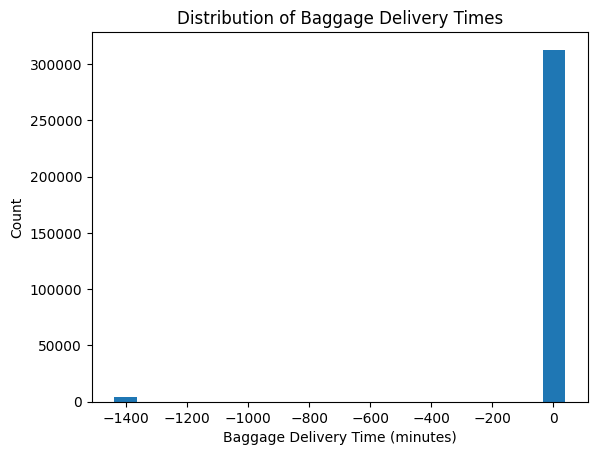

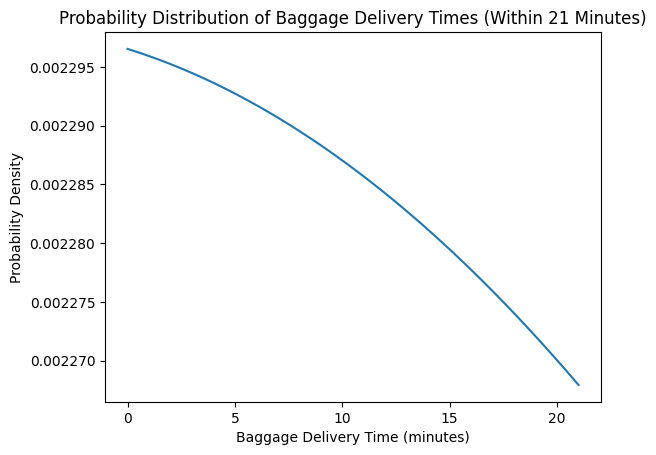

In [ ]:
# prompt: plot a bell-curve of the probability distribution curve of baggageDeliveryTime that falls within 21 mins

import numpy as np
from scipy.stats import norm

# Filter data for delivery times within 21 minutes
delivery_times_within_21 = df[df['BaggageDeliveryTime'] <= 21]['BaggageDeliveryTime']

# Fit a normal distribution to the filtered data
mu, std = norm.fit(delivery_times_within_21)

# Generate x-values for the plot
x = np.linspace(0, 21, 100)

# Calculate the corresponding y-values (probability density function)
y = norm.pdf(x, mu, std)

# Plot the bell curve
plt.plot(x, y)
plt.xlabel('Baggage Delivery Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Baggage Delivery Times (Within 21 Minutes)')
plt.show()


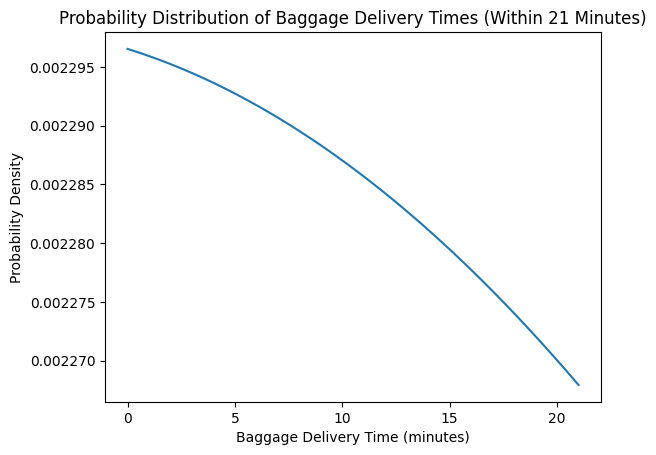

In [ ]:
# prompt: plot a normal distribution probability curve of delivery time meeting 21 mins

# Filter data for delivery times within 21 minutes
delivery_times_within_21 = df[df['BaggageDeliveryTime'] <= 21]['BaggageDeliveryTime']

# Fit a normal distribution to the filtered data
mu, std = norm.fit(delivery_times_within_21)

# Generate x-values for the plot
x = np.linspace(0, 21, 100)

# Calculate the corresponding y-values (probability density function)
y = norm.pdf(x, mu, std)

# Plot the bell curve
plt.plot(x, y)
plt.xlabel('Baggage Delivery Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Baggage Delivery Times (Within 21 Minutes)')
plt.show()


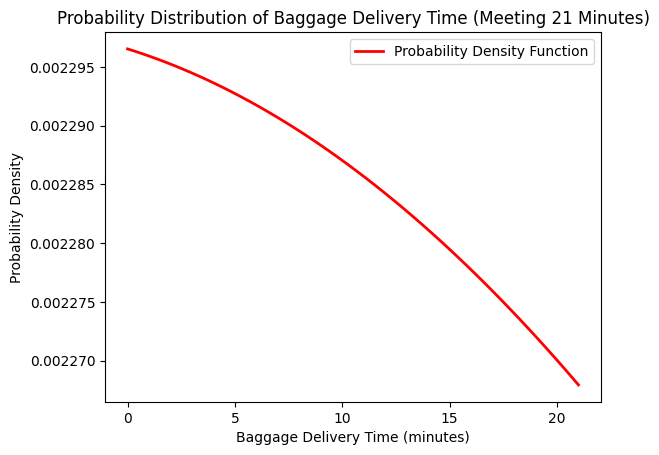

In [ ]:
# prompt: plot a probability distribution curve of baggageDeliveryTime representing a bell-curve with deliverytime meeting 21 minutes

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Assuming df['BaggageDeliveryTime'] contains your data
# Filter data for delivery times meeting the 21-minute mark
delivery_times_under_21 = df[df['BaggageDeliveryTime'] <= 21]['BaggageDeliveryTime']

# Fit a normal distribution to the data
mu, std = norm.fit(delivery_times_under_21)

# Generate x-values for the plot
x = np.linspace(0, delivery_times_under_21.max(), 100)

# Calculate the corresponding probability density function (PDF) values
pdf = norm.pdf(x, mu, std)

# Plot the probability distribution curve
plt.plot(x, pdf, 'r-', lw=2, label='Probability Density Function')
plt.xlabel('Baggage Delivery Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Baggage Delivery Time (Meeting 21 Minutes)')
plt.legend()
plt.show()
